# [new video] test code - RTFM
- 새로운 동영상을 I3D로 feature extract한 npy 파일이 있어야 함
- https://pypi.org/project/i3dFeatureExtraction/

In [1]:
from google.colab import drive
import os
import glob
import pickle

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 모델 풀기

!unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/[3]RTFM_ucf_cctv.zip' -d '/content/RTFM'
#!unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/[3]RTFM_ucf.zip' -d '/content/RTFM'

In [3]:
# npy 파일이 zip인 경우 풀기
!unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/cctv_test_robbery_npy.zip' -d '/content/npy'

In [3]:
# visdom 사용을 위해 외부 망에서 localhost 이용(??)
# https://github.com/fossasia/visdom/issues/419

! npm install -g localtunnel
get_ipython().system_raw('/usr/local/bin/python -m pip install visdom')
get_ipython().system_raw('/usr/local/bin/python -m visdom.server -port 6006 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.503s


In [4]:
# https://stackoverflow.com/questions/50639768/colaboratory-virtual-instances-ip-range
# 리눅스 공인 IP 확인..
!curl ipecho.net/plain

34.32.235.188

In [5]:
# 결과 값 시각화를 위한 visdom 설치

! pip install visdom

(여러 동영상) 동영상 폴더 풀기

In [ ]:
# test list

path_dir = '/content/npy/dataset/test_npy'
new_test_file_list = glob.glob(path_dir+'/*')

new_test_file_list

(개별 동영상) 리스트 생성

In [6]:
new_test_file_list = ['/content/drive/MyDrive/zerobase deeplearning/final_team_project/[7]test npy 파일/cut_182-1_cam02_robbery01_place03_night_spring.npy']
print(new_test_file_list)

['/content/drive/MyDrive/zerobase deeplearning/final_team_project/[7]test npy 파일/cut_182-1_cam02_robbery01_place03_night_spring.npy']


In [7]:
os.chdir('/content/RTFM/RTFM/list')

with open('/content/RTFM/RTFM/list/ucf-i3d-only_test.list', 'w') as f:
  for each in new_test_file_list:
    print(each)
    f.write(each + '\n')

/content/drive/MyDrive/zerobase deeplearning/final_team_project/[7]test npy 파일/cut_182-1_cam02_robbery01_place03_night_spring.npy


In [8]:
os.chdir('/content/RTFM/RTFM')

In [9]:
%run /content/RTFM/RTFM/main_test.py

normal list for ucf
['/content/npy/dataset/train_npy/8-5_cam01_assault03_place05_day_summer.npy\n', '/content/npy/dataset/train_npy/Robbery131_x264.npy\n', '/content/npy/dataset/train_npy/Robbery061_x264.npy\n', '/content/npy/dataset/train_npy/Robbery041_x264.npy\n', '/content/npy/dataset/train_npy/Robbery132_x264.npy\n', '/content/npy/dataset/train_npy/Robbery021_x264.npy\n', '/content/npy/dataset/train_npy/7-6_cam02_assault01_place04_day_summer.npy\n', '/content/npy/dataset/train_npy/Fighting014_x264.npy\n', '/content/npy/dataset/train_npy/Assault002_x264.npy\n', '/content/npy/dataset/train_npy/Robbery030_x264.npy\n', '/content/npy/dataset/train_npy/33-2_cam02_fight01_place02_night_summer.npy\n', '/content/npy/dataset/train_npy/Robbery084_x264.npy\n', '/content/npy/dataset/train_npy/Robbery127_x264.npy\n', '/content/npy/dataset/train_npy/Fighting017_x264.npy\n', '/content/npy/dataset/train_npy/Robbery067_x264.npy\n', '/content/npy/dataset/train_npy/Robbery073_x264.npy\n', '/content/n

In [10]:
rand_x = np.arange(len(pred))
rand_x

array([   0,    1,    2, ..., 1261, 1262, 1263])

In [11]:
print(pred)

[0.01478027 0.01478027 0.01478027 ... 0.00012136 0.00012136 0.00012136]


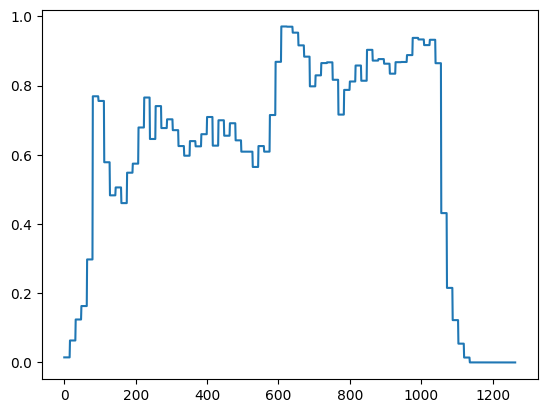

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rand_x, pred)
plt.show()

In [13]:
new_folder = '/content/test_video_pred_npy_folder'
os.mkdir(new_folder)
print(glob.glob(new_folder))

['/content/test_video_pred_npy_folder']


In [15]:
os.chdir('/content/test_video_pred_npy_folder')
import numpy as np
np.save('cut_182-1_cam02_robbery01_place03_night_spring.npy', pred)

# [new video] save test video predicted npy files

In [ ]:
import locale
print(locale.getpreferredencoding())

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!zip -r /content/drive/MyDrive/test_video_pred_ucfcrime_npy.zip /content/test_video_pred_npy_folder